In [ ]:
import h2o
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator


In [ ]:
h2o.init(max_mem_size = 2) # initializing h2o server
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,48 mins 42 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,2 months and 21 days
H2O cluster name:,H2O_from_python_rachel_h4vb8c
H2O cluster total nodes:,1
H2O cluster free memory:,1.613 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [ ]:
cData = pd.read_csv("cervical_cancer2.csv")
cData.describe()
# H2O method
# creditData_df = h2o.import_file(r"File_Path\creditcard.csv")

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.451049,16.856643,2.127040,0.143357,1.201241,0.446278,0.560606,1.972394,0.096737,...,0.508159,0.481352,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.698528,3.183491,1.508108,0.350641,4.060623,2.210351,0.496603,3.597888,0.295771,...,2.388333,2.297125,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cData.shape

(858, 36)

In [ ]:
cData.isnull().values.any() # pandas method
#bData_h2o.na_omit() # h2o method
#bData_h2o.nacnt() # no missing values found

False

In [ ]:
cData.dropna()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.000000,37.00,1,3.00,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.000000,0.00,1,15.00,0,...,0,0,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34.000000,3.40,0,0.00,1,...,0,0,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0.000000,0.00,1,2.00,1,...,0,0,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0.000000,0.00,0,0.00,0,...,0,0,1,0,1,1,0,0,0,0
9,44,3,15,0,1,1.266973,2.80,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cData.isnull().values.any()

False

In [ ]:
# Turns python pandas frame into an H2OFram
cData_h2o  = h2o.H2OFrame(cData)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Text(0, 0.5, 'Frequency')

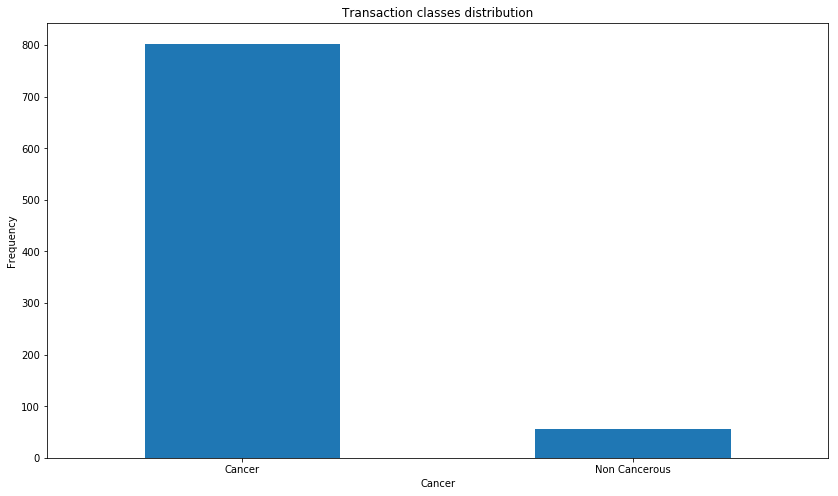

In [ ]:
# Let’s plot the Transaction class against the Frequency
labels = ['Cancer','Non Cancerous']
classes = pd.value_counts(cData['Biopsy'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title('Transaction classes distribution')
plt.xticks(range(2), labels)
plt.xlabel('Cancer')
plt.ylabel('Frequency')

In [ ]:
y=cData['Biopsy'].values
X=cData.drop(['Biopsy'],axis=1).values

In [ ]:
cData

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.000000,37.00,1,3.00,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.000000,0.00,1,15.00,0,...,0,0,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34.000000,3.40,0,0.00,1,...,0,0,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0.000000,0.00,1,2.00,1,...,0,0,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0.000000,0.00,0,0.00,0,...,0,0,1,0,1,1,0,0,0,0
9,44,3,15,0,1,1.266973,2.80,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


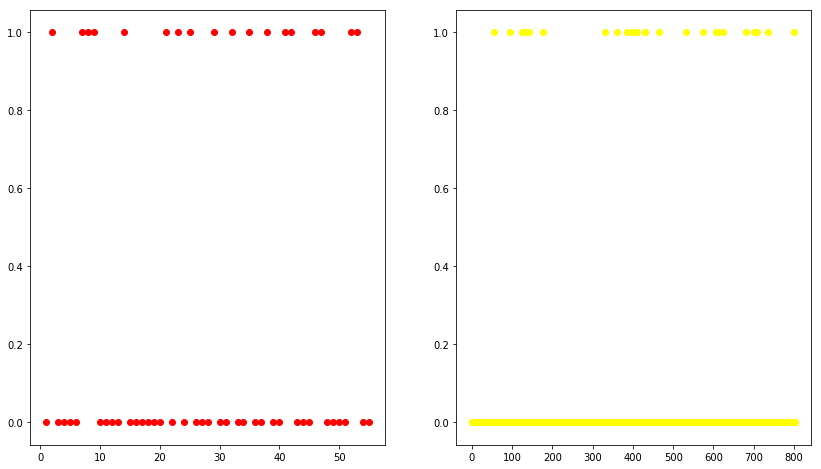

In [ ]:
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}
can = cData[cData.Biopsy == 1]
ncan = cData[cData.Biopsy == 0]
fig,axes = plt.subplots(1,2)

axes[0].scatter(list(range(1,can.shape[0] + 1)), can.Citology,color='red')
axes[1].scatter(list(range(1, ncan.shape[0] + 1)), ncan.Citology,color='yellow')
plt.show()

In [ ]:
# Turns python pandas frame into an H2OFrame
cData_h2o  = h2o.H2OFrame(cData)
    # check if there is any null values
    # creditData.isnull().sum() # pandas m
cData_h2o.na_omit() # h2o method
cData_h2o.nacnt() # no missing values found

Parse progress: |█████████████████████████████████████████████████████████| 100%


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
features=cData_h2o

In [ ]:
# 80% for the training set and 20% for the testing set
train, test = features.split_frame([0.8])
print(train.shape)
print(test.shape)

(671, 36)
(187, 36)


In [ ]:
test

Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,3,15,0,1,1.26697,2.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,3,15,3,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,6,26,1,0,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,3,17,5,1,1.26697,0.513202,1,10,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,3,17,5,0,0,0,1,1,1,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,2,17,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,2,18,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,15,15,0,1,0,1,0,1,0,1
40,2,20,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,5,17,3,0,0,0,1,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df = train.as_data_frame()
test_df = test.as_data_frame()

#train_df = train_df[train_df['diagnosis'] == 0]
train_df = train_df.drop(['Biopsy'], axis=1)

Y_test_df = test_df['Biopsy']

test_df = test_df.drop(['Biopsy'], axis=1)

print(train_df.shape,test_df.shape)

(671, 35) (187, 35)


In [ ]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                                   hidden = [14,7,7,14],
                                   epochs = 100,
                                   standardize = True,
                                    stopping_metric = 'MSE', # MSE for autoencoders
                                    loss = 'automatic',
                                    train_samples_per_iteration = 32,
                                    shuffle_training_data = True,
                                   autoencoder = True,
                                   l1 = 10e-5)
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [ ]:
anomaly_model._model_json['output']

Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1,186 weights/biases, 23.1 KB, 67,111 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,31,Input,0.0,,,,,,,,,
,2,14,Tanh,0.0,0.0001,0.0,0.0419950,0.1108584,0.0,-0.0093222,0.1367776,0.0649880,0.2394641
,3,7,Tanh,0.0,0.0001,0.0,0.0088497,0.0032186,0.0,0.0508235,0.2814310,-0.0527125,0.0785004
,4,7,Tanh,0.0,0.0001,0.0,0.0065158,0.0014952,0.0,-0.0075174,0.4514848,-0.0365111,0.0925099
,5,14,Tanh,0.0,0.0001,0.0,0.0064314,0.0019658,0.0,0.0388829,0.4042134,0.1063689,0.2365125
,6,31,Tanh,,0.0001,0.0,0.0117696,0.0262444,0.0,0.0117145,0.2353691,0.0947520,0.1923363


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2019-10-18 17:18:38,0.066 sec,0.00000 obs/sec,0.0,0,0.0,0.2300417,0.0529192
,2019-10-18 17:18:43,5.048 sec,13514 obs/sec,100.0163934,2103,67111.0,0.0808711,0.0065401



ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.006540129046301854
RMSE: 0.08087106433268858
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Hormonal Contraceptives,1.0,1.0,0.0674231
IUD,0.9734021,0.9734021,0.0656298
Smokes,0.9105289,0.9105289,0.0613907
STDs:vulvo-perineal condylomatosis,0.8931700,0.8931700,0.0602203
Dx,0.8671576,0.8671576,0.0584665
---,---,---,---
STDs:vaginal condylomatosis,0.0324577,0.0324577,0.0021884
First sexual intercourse,0.0276067,0.0276067,0.0018613
STDs:molluscum contagiosum,0.0121689,0.0121689,0.0008205
STDs:Hepatitis B,0.0041875,0.0041875,0.0002823



See the whole table with table.as_data_frame()


{'__meta': {'schema_version': 3,
  'schema_name': 'DeepLearningModelOutputV3',
  'schema_type': 'DeepLearningModelOutput'},
 'names': ['Age',
  'Number of sexual partners',
  'First sexual intercourse',
  'Num of pregnancies',
  'Smokes',
  'Smokes (years)',
  'Smokes (packs/year)',
  'Hormonal Contraceptives',
  'Hormonal Contraceptives (years)',
  'IUD',
  'IUD (years)',
  'STDs',
  'STDs (number)',
  'STDs:condylomatosis',
  'STDs:vaginal condylomatosis',
  'STDs:vulvo-perineal condylomatosis',
  'STDs:syphilis',
  'STDs:molluscum contagiosum',
  'STDs:HIV',
  'STDs:Hepatitis B',
  'STDs:HPV',
  'STDs: Number of diagnosis',
  'STDs: Time since first diagnosis',
  'STDs: Time since last diagnosis',
  'Dx:Cancer',
  'Dx:CIN',
  'Dx:HPV',
  'Dx',
  'Hinselmann',
  'Schiller',
  'Citology'],
 'column_types': ['Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',


TypeError: unsupported operand type(s) for +: 'int' and 'H2OResponse'

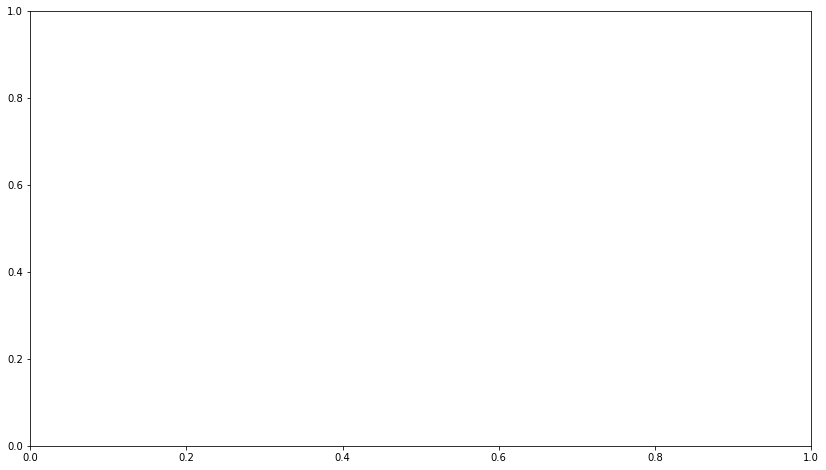

In [ ]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']
#print(variables)
#var = variables[0:5]
y_pos = np.arange(len(variables))

scaled_importance = anomaly_model._model_json['output']
#sc = scaled_importance[0:5]

ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

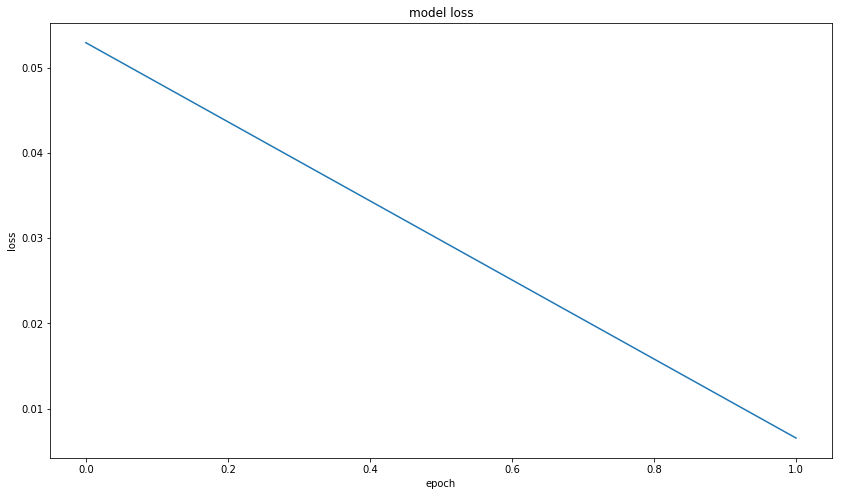

In [ ]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('Graph16.png',dpi=300,bbox_inches='tight')
plt.show

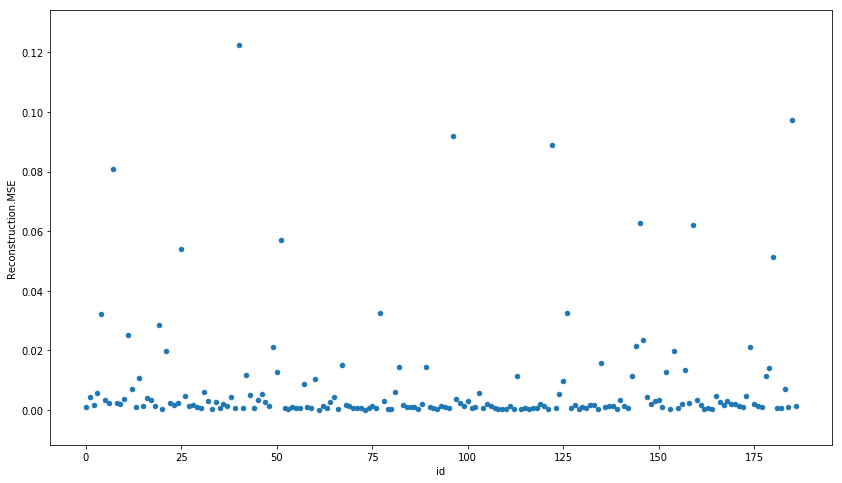

In [ ]:
test_rec_error = anomaly_model.anomaly(test_h2o)
# anomaly is a H2O function which calculates the error for the dataset
# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()
# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.savefig('Graph16.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,187.000000,187.000000
mean,0.008059,0.080214
std,0.018319,0.272353
min,0.000084,0.000000
25%,0.000740,0.000000
50%,0.001716,0.000000
75%,0.004725,0.000000
max,0.122465,1.000000


In [ ]:
error_df

,reconstruction_error,true_class
0,0.000943,0
1,0.004436,0
2,0.001749,0
3,0.005724,0
4,0.032325,0
5,0.003260,0
6,0.002394,0
7,0.080787,1
8,0.002489,0
9,0.002018,0


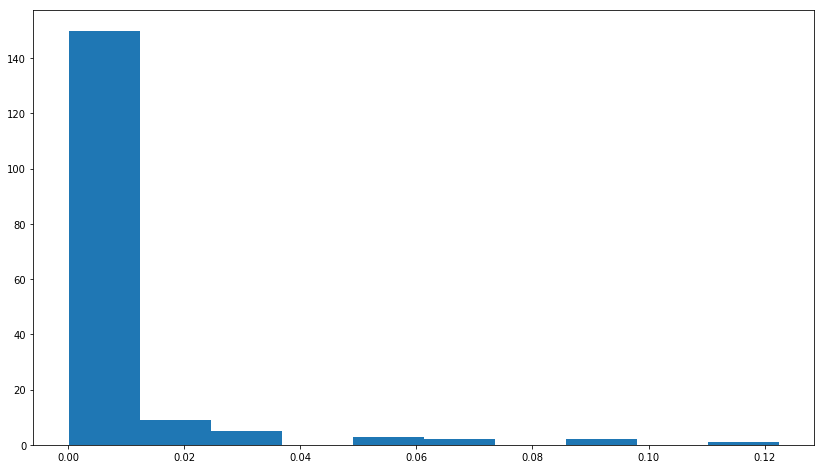

In [ ]:
# reconstruction error for the normal transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

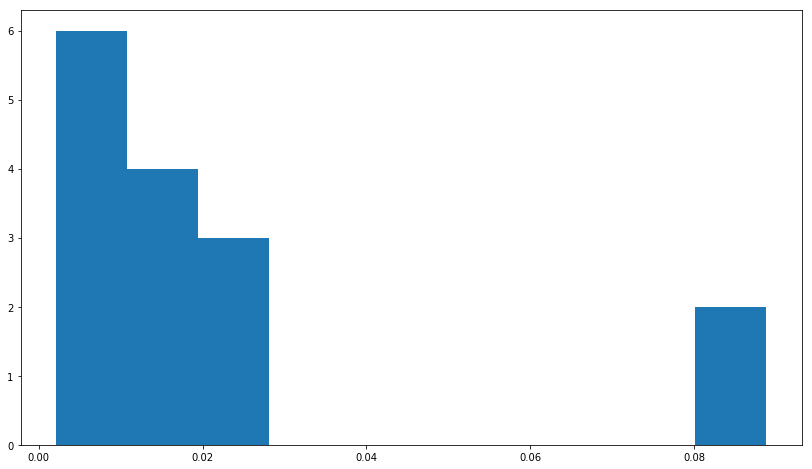

In [ ]:
# reconstruction error for the fraud transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)


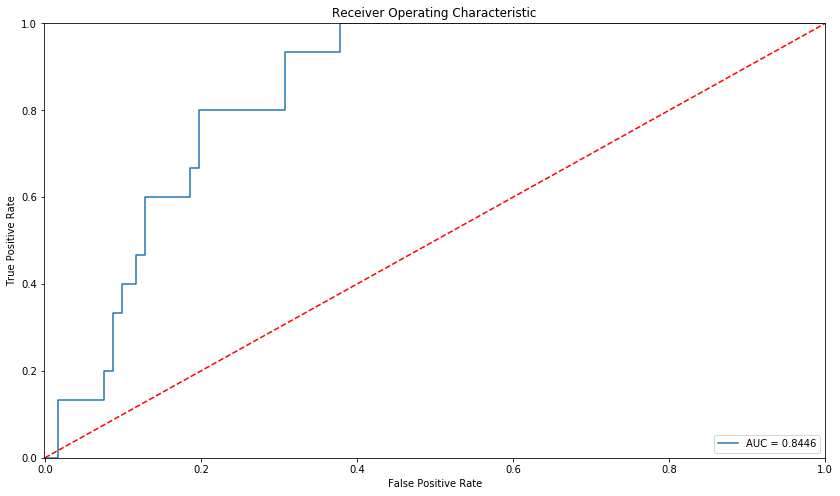

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Graph15.png',dpi=300,bbox_inches='tight')
plt.show();


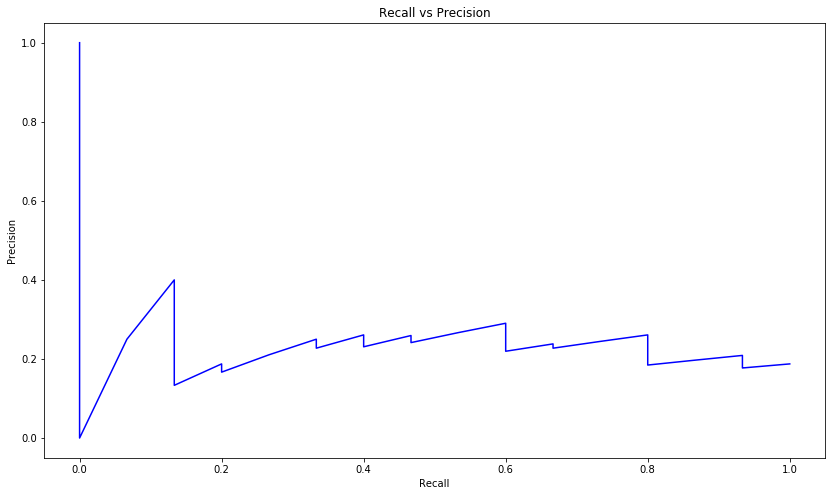

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('Graph14.png',dpi=300,bbox_inches='tight')
plt.show()

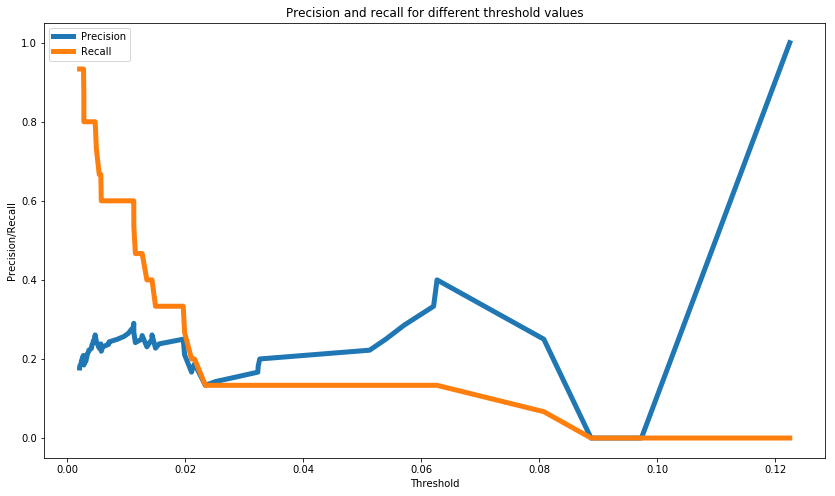

In [ ]:
plt.plot(th, precision[1:], label="Precision",linewidth=5)
plt.plot(th, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.savefig('Graph13.png',dpi=300,bbox_inches='tight')
plt.show()

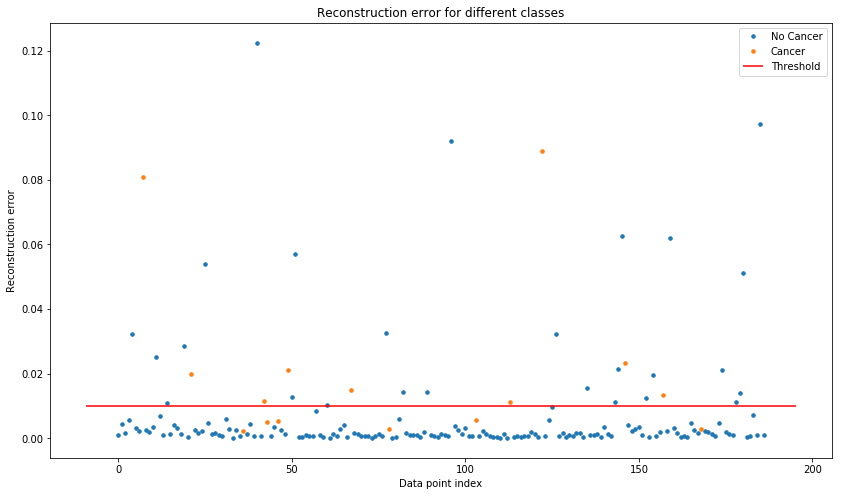

In [ ]:
# plot the testing set with the threshold
threshold = 0.01
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Cancer" if name == 1 else "No Cancer")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.savefig('Graph12.png',dpi=300,bbox_inches='tight')
plt.show();

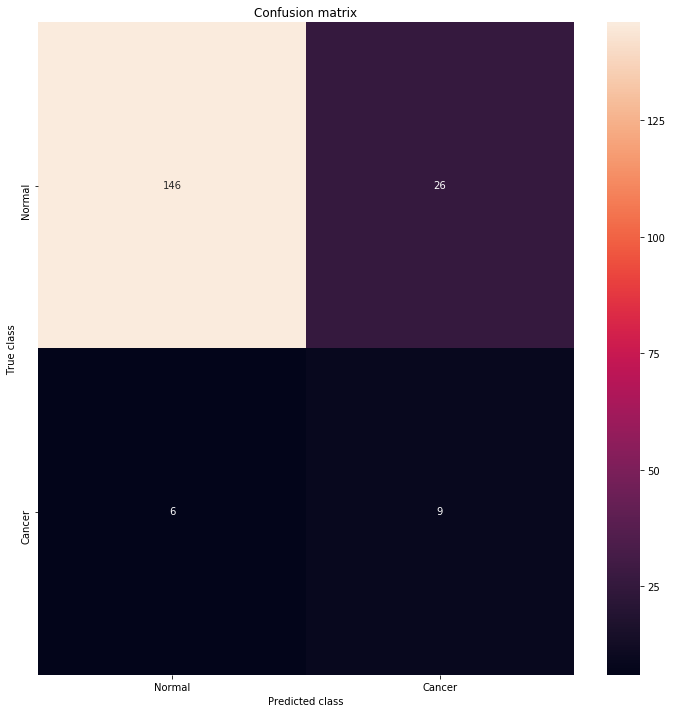

In [ ]:
import seaborn as sns
LABELS = ['Normal', 'Cancer']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.savefig('Graph10.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       160
           1       0.29      0.78      0.42         9

   micro avg       0.89      0.89      0.89       169
   macro avg       0.64      0.84      0.68       169
weighted avg       0.95      0.89      0.91       169

